<a href="https://colab.research.google.com/github/ashraful005/DS_ML_Bootcamp/blob/master/novel89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
%%capture
!pip install torchmetrics
!pip install torchinfo

In [94]:
# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ashraful005","key":"4f746c27dab22414e17a0f5a0fe3baca"}'}

In [96]:
!pip install kaggle

In [97]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [98]:
!cp kaggle.json ~/.kaggle

In [99]:
!chmod 600 ~/.kaggle/kaggle.json

In [100]:
pip install --upgrade kaggle


In [101]:
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           9405        222  1.0              
bhavikjikadara/loan-status-prediction                              Loan Status Prediction                               5KB  2024-02-02 13:27:20            848         30  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          15143        266  1.0              
asaniczka/video-game-sales-2024                   

In [102]:
!kaggle datasets download 'subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia'

freshwater-fish-disease-aquaculture-in-south-asia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [103]:
!unzip freshwater-fish-disease-aquaculture-in-south-asia.zip

Archive:  freshwater-fish-disease-aquaculture-in-south-asia.zip
replace SB-Fish-Disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [104]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

**Load** **Dataset**

In [105]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#dataset_path = '/content/SB-FishDisease'

IMAGE_SIZE = 224
BATCH_SIZE = 32
EPOCHS=50

dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/SB-FishDisease/SB-FishDisease",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,

)





Found 457 files belonging to 7 classes.


In [106]:
resize_and_rescale= tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [107]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [108]:
print(len(dataset))

15


In [109]:
classes=dataset.class_names
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

(32, 224, 224, 3)
[3 4 1 6 4 0 0 0 6 0 4 4 4 3 4 0 4 3 6 2 5 4 6 5 4 5 3 4 4 2 4 2]
(224, 224, 3)


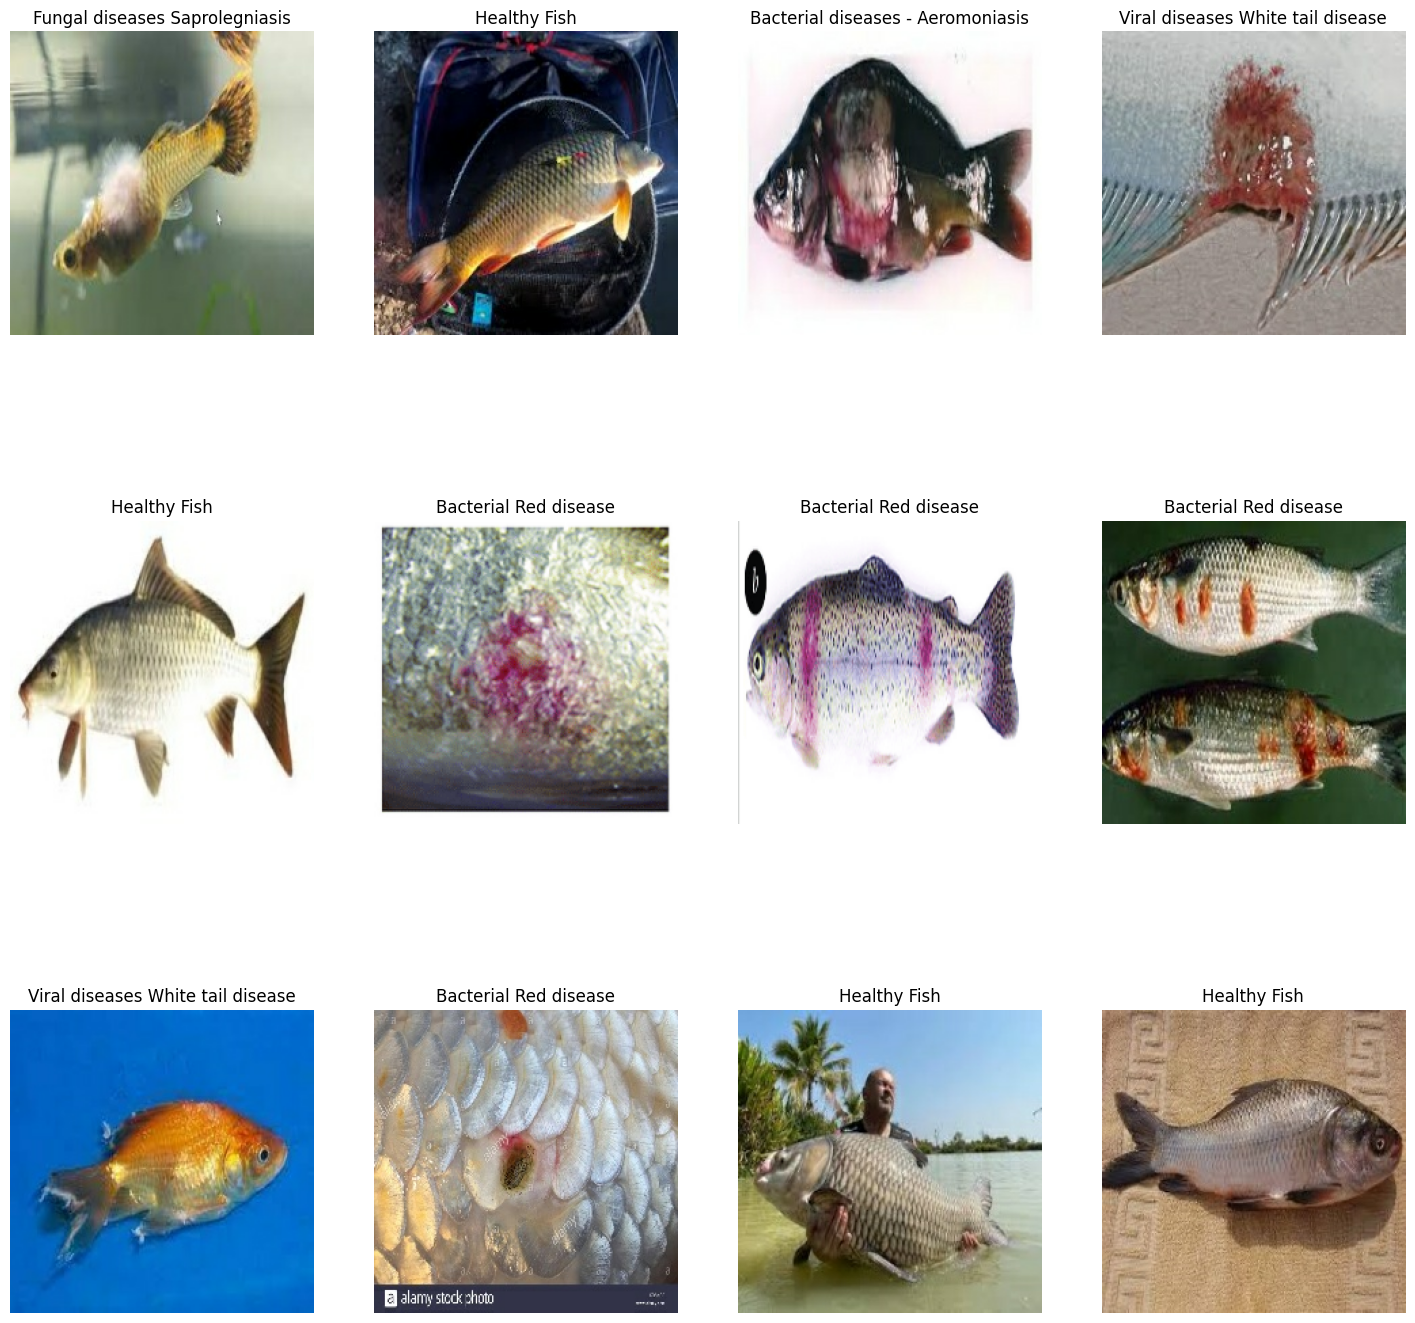

In [110]:
plt.figure(figsize=(18,18))
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())
  print(image_batch[0].shape)
  for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(classes[label_batch[i]])
      plt.axis("off")

In [111]:
train_size=0.7
val_size=0.1
len(dataset)*train_size

10.5

In [112]:
train_ds=dataset.take(int(len(dataset)*train_size))
len(train_ds)

10

In [113]:
secondary_ds = dataset.skip(int(len(dataset)*train_size))
len(secondary_ds)

5

In [114]:
import math
val_ds=secondary_ds.take(math.ceil(len(secondary_ds)*val_size))
len(val_ds)

1

In [115]:
test_ds=secondary_ds.skip(math.ceil(len(secondary_ds)*val_size))
len(test_ds)

4

In [150]:
import tensorflow as tf
from tensorflow.keras import models, layers

CHANNELS = 3

# Define your model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 7

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=input_shape),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])


model.build(input_shape=input_shape)

In [151]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

In [152]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [153]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
10/10 [==============================] - 4s 95ms/step - loss: 2.4259 - accuracy: 0.2625 - val_loss: 1.6896 - val_accuracy: 0.4688
Epoch 2/50
10/10 [==============================] - 1s 80ms/step - loss: 1.7962 - accuracy: 0.3781 - val_loss: 1.7648 - val_accuracy: 0.3750
Epoch 3/50
10/10 [==============================] - 1s 82ms/step - loss: 1.7316 - accuracy: 0.3906 - val_loss: 1.7680 - val_accuracy: 0.3438
Epoch 4/50
10/10 [==============================] - 1s 118ms/step - loss: 1.7193 - accuracy: 0.3781 - val_loss: 1.4878 - val_accuracy: 0.5625
Epoch 5/50
10/10 [==============================] - 1s 78ms/step - loss: 1.6230 - accuracy: 0.4344 - val_loss: 1.4298 - val_accuracy: 0.4688
Epoch 6/50
10/10 [==============================] - 1s 82ms/step - loss: 1.6621 - accuracy: 0.4125 - val_loss: 1.5132 - val_accuracy: 0.4062
Epoch 7/50
10/10 [==============================] - 1s 118ms/step - loss: 1.6029 - accuracy: 0.4094 - val_loss: 1.8270 - val_accuracy: 0.3125
Epoch 8/50


In [154]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 1s 84ms/step - loss: 0.4477 - accuracy: 0.8952


In [155]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [156]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

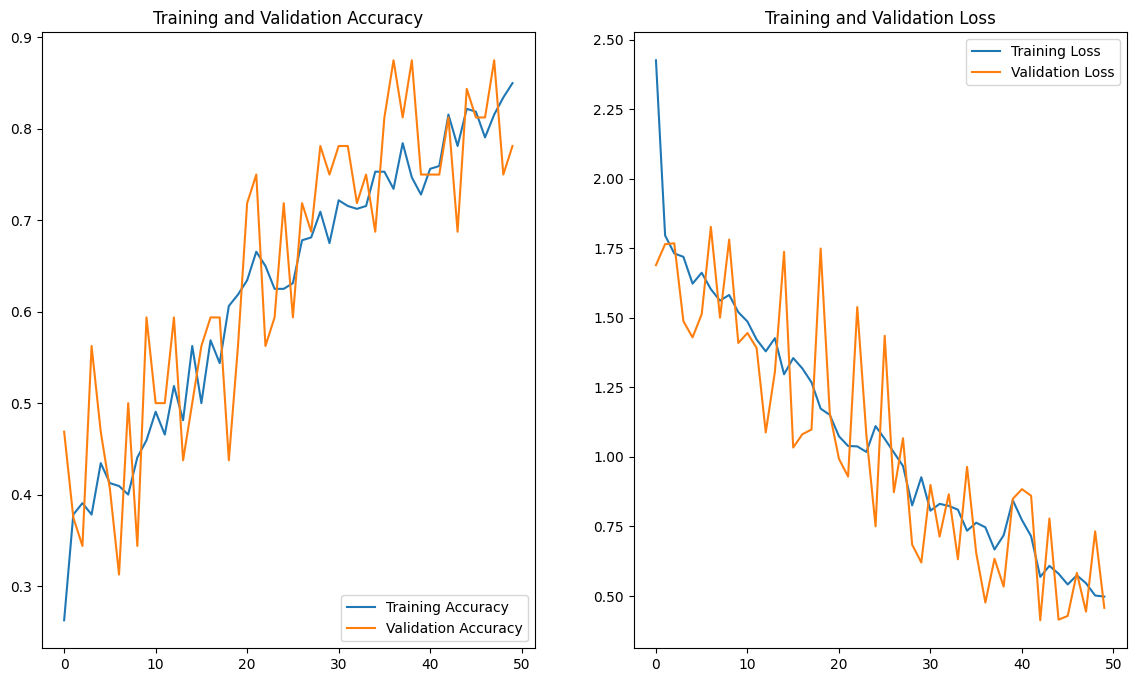

In [158]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

First image to predict
Actual label:  Healthy Fish
1/1 [==============================] - 0s 139ms/step
Predicted label: Healthy Fish


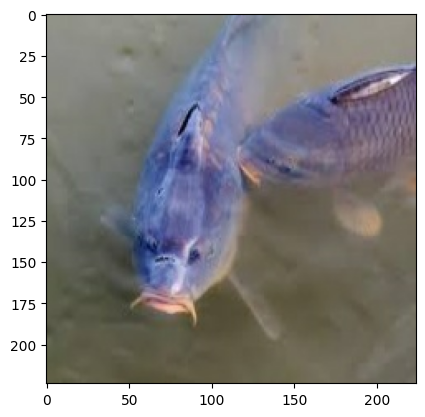

In [159]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print("First image to predict")
  plt.imshow(first_image)
  print("Actual label: ", classes[first_label])

  batch_predict = model.predict(image_batch)
  print("Predicted label:", classes[np.argmax(batch_predict[0])])

In [160]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = classes[np.argmax(predictions[0])]
  probabilities = tf.nn.softmax(predictions)
  confidence = 100 * probabilities[0, np.argmax(predictions)]

  return predicted_class,confidence

1/1 [==============================] - 0s 23ms/step


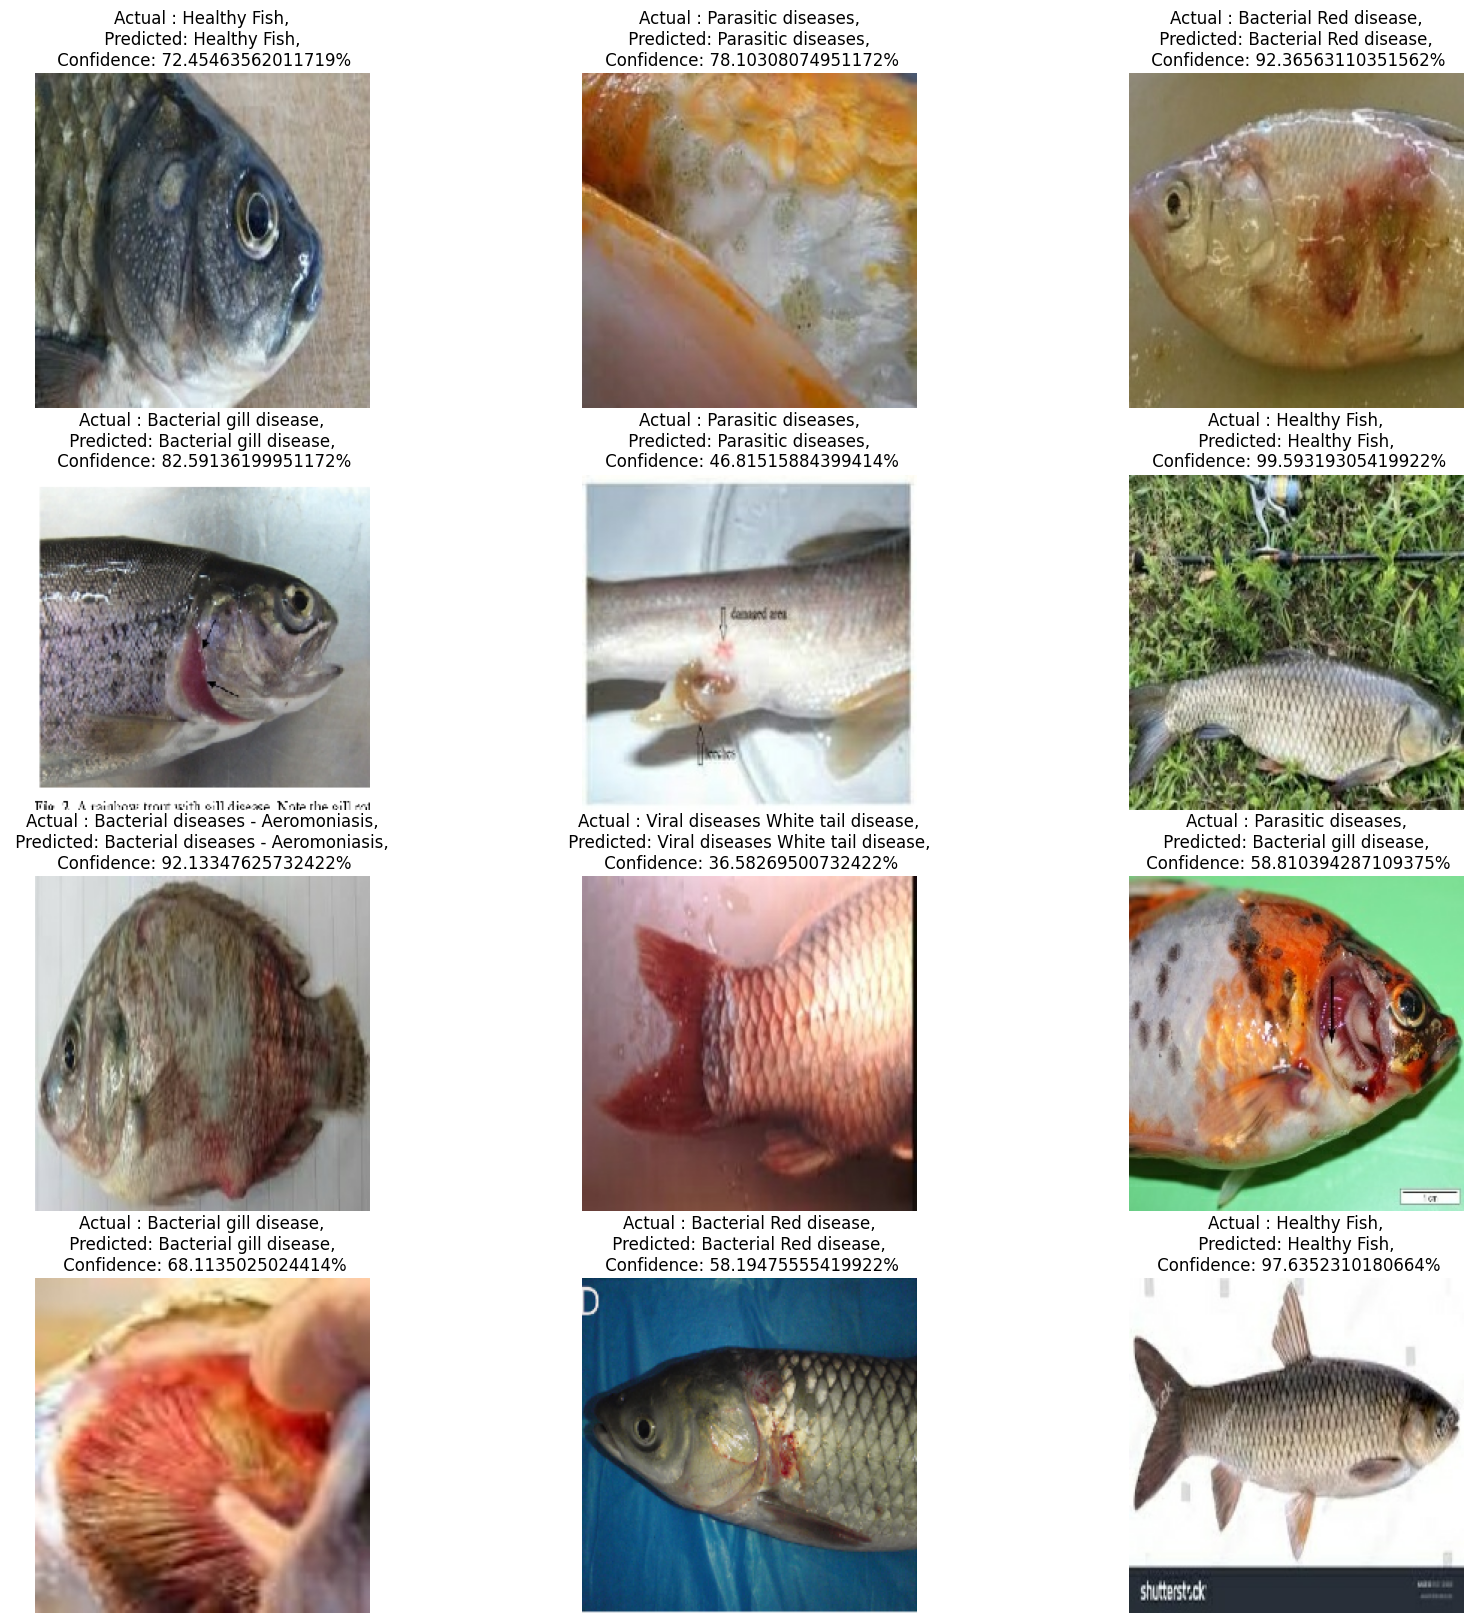

In [161]:
plt.figure(figsize=(20,20))

for images, labels in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4,3, i+1)
    predicted_class, confidence = predict(model, images[i].numpy())
    actual_class = classes[labels[i]]

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
    plt.axis("off")

In [162]:
model_version=1
model.save(f"../models/{model_version}")

In [163]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [164]:
x_train = []
y_train = []

for img, label in train_ds:
    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train).astype('uint8').reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
y_train = np.array(x_train)
print(f"x_train= {x_train.shape} y_train= {y_train.shape}")

x_train= (320, 224, 224, 3) y_train= (320, 224, 224, 3)


In [165]:
x_test = []
y_test = []

for img,label in test_ds:
    x_test.append(img)
    y_test.append(label)

import numpy as np

# Assuming x_test and y_test are lists containing images and labels from test_ds

# Convert each image in x_test to NumPy array and reshape
x_test_array = []
for img in x_test:
    img_array = np.array(img)
    # Ensure the image has the correct shape and data type
    img_array = img_array.astype('uint8')
    x_test_array.append(img_array)

# Convert the list of image arrays to a single NumPy array
x_test_array = np.array(x_test_array)

# Print the shape of x_test_array to verify
print("Shape of x_test_array:", x_test_array.shape)

# Assuming IMAGE_SIZE is defined earlier
x_test_array = x_test_array

# Print the new shape of x_test_array
print("New shape of x_test_array:", x_test_array.shape)

#x_test = np.array(x_test).astype('uint8').reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 3)
#y_test = np.array(y_test)

#print(f"x_test= {x_test.shape} y_test= {y_test.shape}")
#x_train, x_test = x_train / 255.0, x_test / 255.0

Shape of x_test_array: (4,)
New shape of x_test_array: (4,)


In [166]:
for images, labels in test_ds.take(len(test_ds)):
  for i in range(BATCH_SIZE):
    predicted_class, confidence = predict(model, images[i].numpy().astype('uint8'))
    actual_class = classes[labels[i]]
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(actual_class,predicted_class)
cm

1/1 [==============================] - 0s 16ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 9 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [ ]:
# Confusion Matrix Plot
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax = ax.flat
sns.heatmap(cf_mx_train,
            cmap = 'Blues',
            annot = True,
            fmt = ' ',
            annot_kws = {"fontsize":10,
                         "fontweight":"bold"},
            linewidths = 1,
            linecolor = "white",
            cbar = False,
            square = True,
            xticklabels = classes,
            yticklabels = classes,
            ax = ax[0])
ax[0].set_title('Confusion Matrix Train', fontsize = 12, fontweight = 'bold', color = 'black')